<a href="https://colab.research.google.com/github/Gitprincesskerry/Unit2_Python/blob/main/Project2Unit3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''MINI PROJECT: COVID 19 Data Analysis

Description: Ingest data from the latest New York Times' county-level COVID-19 database 
at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a
chosen state, calculate the daily count of new cases and new deaths, print the most recent 30 days' worth of data for
the selected county. Perform EDA and show your findings through different plots and visualization techniques.

Task 1 : Environment Set up
Task 2 : Data Collection
Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)
Task 4: Understand NY Covid 19 data in last 30 days
Task 5: Comparing Covid 19 data with different states
Task 6: Conclusion
'''

"MINI PROJECT: COVID 19 Data Analysis\n\nDescription: Ingest data from the latest New York Times' county-level COVID-19 database \nat https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a\nchosen state, calculate the daily count of new cases and new deaths, print the most recent 30 days' worth of data for\nthe selected county. Perform EDA and show your findings through different plots and visualization techniques.\n\nTask 1 : Environment Set up\nTask 2 : Data Collection\nTask 3 : Data Wrangling and EDA (Exploratory Data Analysis)\nTask 4: Understand NY Covid 19 data in last 30 days\nTask 5: Comparing Covid 19 data with different states\nTask 6: Conclusion\n"

In [2]:
# Task 1: Environment Set up
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Task 2: Data Collection: The following two lines imports the csv file from the link above and prints the first few records and confirms there are 939K+ rows × 6 columns
covid_file = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
covid_file

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
939983,2021-01-17,Sweetwater,Wyoming,56037.0,3290,26.0
939984,2021-01-17,Teton,Wyoming,56039.0,2685,4.0
939985,2021-01-17,Uinta,Wyoming,56041.0,1817,9.0
939986,2021-01-17,Washakie,Wyoming,56043.0,842,23.0


county
Westchester    414692.0
Name: deaths, dtype: float64

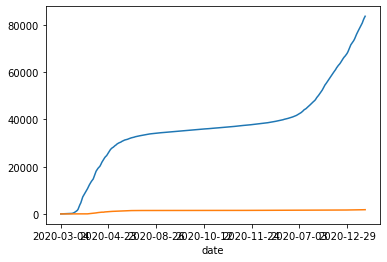

In [4]:
#Task 3: Data Wrangling and EDA

#Selects the date, county, state, fips, cases, and deaths columns from the file (the aforementioned fields are all of the columns.)
covid_file[['date','county','state', 'fips', 'cases', 'deaths']]
covid_file

#Filters Westchester County in New York State 
covid_file_westchester_newyork = covid_file[(covid_file['county']=='Westchester') & (covid_file['state']=='New York')]
covid_file_westchester_newyork

#Confirms the number of cases in Westchester County, New York and saves it in a variable named c3
c3 = covid_file_westchester_newyork.groupby(['county'])['cases'].count()
c3

#Calculates the count cases per day in Westchester County, New York and depicts this information via a line graph
c4 = covid_file_westchester_newyork.groupby(['date'])['cases'].sum()
c4

covid_file_westchester_newyork.groupby(['date'])['cases'].sum().sort_values(ascending=True).plot(kind='line')

#Calculates the count deaths per day in Westchester County, New York
c5 = covid_file_westchester_newyork.groupby(['date'])['deaths'].sum()
c5

covid_file_westchester_newyork.groupby(['date'])['deaths'].sum().sort_values(ascending=True).plot(kind='line')

#Calculates the total number of cases in Westchester County, New York
c6 = covid_file_westchester_newyork.groupby(['county'])['cases'].sum()
c6

#Calculates the total number of deaths in Westchester County, New York
c7 = covid_file_westchester_newyork.groupby(['county'])['deaths'].sum()
c7

In [5]:
#Task 4: Understand NY Covid 19 data in last 30 days
'''
df_last30days = covid_file_westchester_newyork[(covid_file_westchester_newyork['date'] >= '2021-12-19') & (covid_file_westchester_newyork['date'] <= '2020-1-18')]
df_last30days
'''

#Perform EDA and show your findings through different plots and visualization techniques......

"\ndf_last30days\xa0=\xa0covid_file_westchester_newyork[(covid_file_westchester_newyork['date']\xa0>=\xa0'2021-12-19')\xa0&\xa0(covid_file_westchester_newyork['date']\xa0<=\xa0'2020-1-18')]\ndf_last30days\n"

,fips,cases,deaths
count,931216.000000,9.399880e+05,919901.000000
mean,31272.924206,2.238276e+03,57.326599
std,16300.883885,1.174562e+04,461.961465
min,1001.000000,0.000000e+00,0.000000
25%,19001.000000,4.100000e+01,0.000000
50%,29217.000000,2.670000e+02,5.000000
75%,46101.000000,1.151000e+03,24.000000
max,78030.000000,1.015063e+06,26036.000000


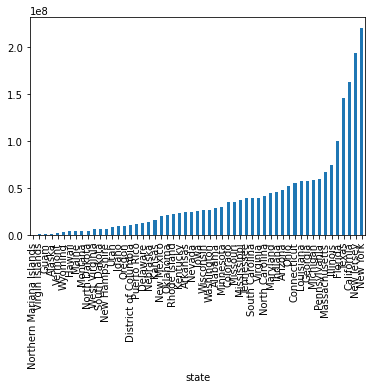

In [6]:
#Task 5: Comparing Covid 19 data with different states

#Calculates the total cases for each state and depicts it via a bar chart
c8 = covid_file.groupby(['state'])['cases'].sum().sort_values(ascending=True)
c8

covid_file.groupby(['state'])['cases'].sum().sort_values(ascending=True).plot(kind='bar')

#Calculates the total deaths for each state and depicts it via a bar graph
c9 = covid_file.groupby(['state'])['deaths'].sum().sort_values(ascending=True)
c9

covid_file.groupby(['state'])['deaths'].sum().sort_values(ascending=True).plot(kind='bar')

#depicts general information regarding the oroginal data set
covid_file.describe()


In [7]:
#Task 6: Conclusion
'''Based on my findings, New York has the highest amount of deaths. The top five states with the highest deaths
are Florida, Texas, California, New Jersey, and New York. Additonally, the top five states with the highest cases
are Illinois, New York, Florida, Texas, and California. When comparing both of the aformentioned statements, the data
tells a story that Illinois and New Jersey residents are recovering from COVID-19 more than New York, Florida, and California. 
'''

'Based on my findings, New York has the highest amount of deaths. The top five states with the highest deaths\nare Florida, Texas, California, New Jersey, and New York. Additonally, the top five states with the highest cases\nare Illinois, New York, Florida, Texas, and California. When comparing both of the aformentioned statements, the data\ntells a story that Illinois and New Jersey residents are recovering from COVID-19 more than New York, Florida, and California. \n'